In [1]:
import numpy as np
from matplotlib import pyplot as plt
n_noshape = 1500
sigma = 1

r = np.random.rayleigh(sigma, n_noshape)
tx_ts = np.random.choice(r, int(0.3*n_noshape))
tx_ts.sort()
rx_ts = np.setdiff1d(r, tx_ts)
rx_ts.sort()
trace = r
trace.sort()

In [2]:
tx_sizes = np.random.randint(75, 89, len(tx_ts))
rx_sizes = np.random.randint(1250, 1515, len(rx_ts))
tx_trace = [i for i in zip (tx_ts, tx_sizes)]
tx_trace.sort(key=lambda t: t[0])
rx_trace = [i for i in zip (rx_ts, -rx_sizes)]
rx_trace.sort(key=lambda t: t[0])
trace = tx_trace + rx_trace
trace.sort(key=lambda t: t[0])
print(trace[:10])
print(trace[-10:])

[(0.012831939125225653, 78), (0.012831939125225653, 79), (0.016804561754553936, -1313), (0.03377015260500599, -1261), (0.036407089108837776, -1324), (0.07874558800333184, -1410), (0.086035736139414, -1464), (0.09128325148942391, -1376), (0.09402732660569098, -1341), (0.09516098805678153, -1500)]
[(3.12464576229072, -1476), (3.1569006946918563, -1341), (3.2420963609617997, 88), (3.244836498416304, -1328), (3.2488265006068238, -1440), (3.3096976906606934, -1271), (3.389770058690303, -1508), (3.6581372294102112, -1290), (3.6806786748530462, -1511), (3.726236346643635, -1404)]


In [3]:
# now create the FRONt dummy trace
N_TX = 900
N_RX = 1200
W_min = 0.5
W_max = 2
dummy_sz = 700
n_tx = np.random.randint(1, N_TX)
n_rx = np.random.randint(1, N_RX)
w_tx = np.random.rand()*(W_max-W_min) + W_min
w_rx = np.random.rand()*(W_max-W_min) + W_min

tx_dummy_ts = np.random.rayleigh(w_tx, n_tx)
rx_dummy_ts = np.random.rayleigh(w_rx, n_rx)


tx_dummy_trace = [(ts, dummy_sz) for ts in tx_dummy_ts]
tx_dummy_trace.sort(key=lambda t: t[0])
rx_dummy_trace = [(ts, -dummy_sz) for ts in rx_dummy_ts]
rx_dummy_trace.sort(key=lambda t: t[0])

print("n_tx: {}".format(n_tx))
print("n_rx: {}".format(n_rx))
print("w_tx: {}".format(w_tx))
print("w_rx: {}".format(w_rx))

defended = trace + tx_dummy_trace + rx_dummy_trace
defended.sort(key=lambda t: t[0])
print(defended[:10])
print(defended[-10:])

n_tx: 440
n_rx: 86
w_tx: 1.4381850140735495
w_rx: 0.6051149737206634
[(0.012831939125225653, 78), (0.012831939125225653, 79), (0.016804561754553936, -1313), (0.03377015260500599, -1261), (0.036407089108837776, -1324), (0.04153622615968269, 700), (0.07874558800333184, -1410), (0.08421134555839542, -700), (0.086035736139414, -1464), (0.09128325148942391, -1376)]
[(3.855286972434816, 700), (3.8767581693539066, 700), (3.951569171997987, 700), (4.024943094759365, 700), (4.051911740441654, 700), (4.1070301696617, 700), (4.180607951848577, 700), (4.219710216163536, 700), (5.548441189932736, 700), (5.598616723334358, 700)]


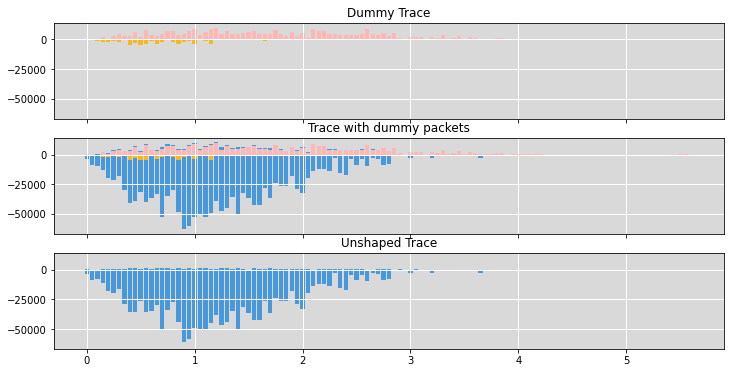

In [57]:
def make_binned(trace, bins): 
    #trace_ts = [ts for (ts, _) in trace]
    #bins = np.arange(0, max(trace_ts)+rate, rate)
    bins = np.append(bins,100000)
    bin_idx = 0
    binned = np.zeros(len(bins))
    for (ts, sz) in trace:
        if ts < bins[bin_idx+1]:
            binned[bin_idx] += sz
        else:
            while ts >= bins[bin_idx+1]:
                bin_idx+=1
            binned[bin_idx] += sz
    return (bins[:-1], binned[:-1])

PALETTE = {'blue': '#4898de',
           'purple': '#a7a3e0',
           'fucsia': '#dab4da',
           'pink': '#f4cddb',
           'rosepink': '#ffb7b6',
           'coral': '#ffae75',
           'orange': '#f7b819'}

fig, ax = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(12,6))
ax[0].set_title("Dummy Trace")
ax[0].set_facecolor('0.85')
ax[0].grid(color='w', linewidth=1)
ax[1].set_title("Trace with dummy packets")
ax[1].set_facecolor('0.85')
ax[1].grid(color='w', linewidth=1)
ax[2].set_title("Unshaped Trace")
ax[2].set_facecolor('0.85')
ax[2].grid(color='w', linewidth=1)

rate = 0.05
defended_ts = [ts for (ts, _) in defended]
bins = np.arange(0, max(defended_ts)+rate, rate)

(rx_dummy_bins, rx_dummy_binned) = make_binned(rx_dummy_trace, bins)
(tx_dummy_bins, tx_dummy_binned) = make_binned(tx_dummy_trace, bins)
(rx_bins, rx_binned) = make_binned(rx_trace, bins)
(tx_bins, tx_binned) = make_binned(tx_trace, bins)

# Print dummy traffic
ax[0].bar(rx_dummy_bins, rx_dummy_binned, width=0.04, color=PALETTE["orange"])
ax[0].bar(tx_dummy_bins, tx_dummy_binned, width=0.04, color=PALETTE["rosepink"])

# Print defended
bottoms = np.zeros(len(rx_binned))
bottoms[:len(rx_dummy_binned)] = rx_dummy_binned
ax[1].bar(rx_dummy_bins, rx_dummy_binned, width=0.04, color=PALETTE["orange"])
ax[1].bar(rx_bins, rx_binned, width=0.04, bottom=bottoms, color=PALETTE["blue"])

bottoms = np.zeros(len(tx_binned))
bottoms[:len(tx_dummy_binned)] = tx_dummy_binned
ax[1].bar(tx_dummy_bins, tx_dummy_binned, width=0.04, color=PALETTE["rosepink"])
ax[1].bar(tx_bins, tx_binned, width=0.04, bottom=bottoms, color=PALETTE["blue"])

# print unshaped
ax[2].bar(rx_bins, rx_binned, width=0.04, color=PALETTE["blue"])
ax[2].bar(tx_bins, tx_binned, width=0.04, color=PALETTE["blue"])

plt.show()

# Dynamic TimeWarping

2095 1569
D: 606587.0


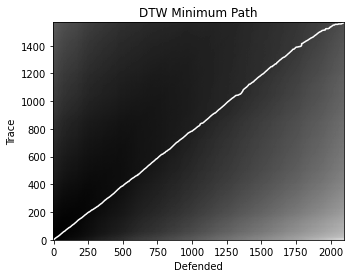

In [5]:
from dtw import dtw, accelerated_dtw

t1 = np.array([sz for (_, sz) in defended])
t2 = np.array([sz for (_, sz) in trace])
print(len(t1), len(t2))

d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(t1,t2, dist='euclidean')

print("D: {}".format(d))

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Defended')
plt.ylabel('Trace')
plt.title('DTW Minimum Path')
plt.show()

D: 328388.0


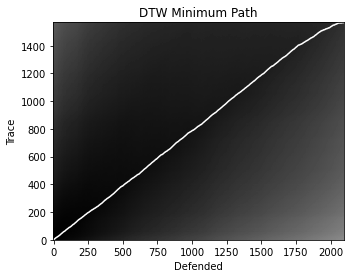

In [6]:
t3 = np.array([abs(sz) for (_, sz) in defended])
t4 = np.array([abs(sz) for (_, sz) in trace])

d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(t3,t4, dist='euclidean')

print("D: {}".format(d))

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Defended')
plt.ylabel('Trace')
plt.title('DTW Minimum Path')
plt.show()

# Pearson 

Needs the same range of values, so the traces are binned to the same rate

5.598616723334358
[5595. 5596. 5597. 5598. 5599.]
5600 5600 5600
[  0.   0.   0. 700.   0.]
[0. 0. 0. 0. 0.]
Scipy computed Pearson r: 0.9585166132646321 and p-value: 0.0


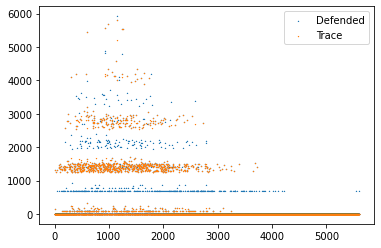

In [64]:
import scipy.stats as stats

# rate in milliseconds of binning the packets
RATE = 1.0

(tail_df, _) = defended[-1]
(tail_tr, _) = trace[-1]
x_lim = max(tail_df, tail_tr)
print(x_lim)
bins = np.arange(0, x_lim*1000 + RATE, RATE)
print(bins[-5:])

(_, binned_df) = make_binned([(1000*ts, abs(sz)) for (ts, sz) in defended], bins)
(_, binned_tr) = make_binned([(1000*ts, abs(sz)) for (ts, sz) in trace], bins)

print(len(bins), len(binned_df), len(binned_tr))
print(binned_df[-5:])
print(binned_tr[-5:])

r,p = stats.pearsonr(binned_df, binned_tr)
print(f"Scipy computed Pearson r: {r} and p-value: {p}")
plt.scatter(bins, binned_df, label="Defended", s=0.5, marker='1')
plt.scatter(bins, binned_tr, label="Trace", s=0.5, marker='2')
plt.legend()
plt.show()

## Rolling window Pearson

        Defended  Trace
0.0          0.0    0.0
1.0          0.0    0.0
2.0          0.0    0.0
3.0          0.0    0.0
4.0          0.0    0.0
...          ...    ...
5595.0       0.0    0.0
5596.0       0.0    0.0
5597.0       0.0    0.0
5598.0     700.0    0.0
5599.0       0.0    0.0

[5600 rows x 2 columns]


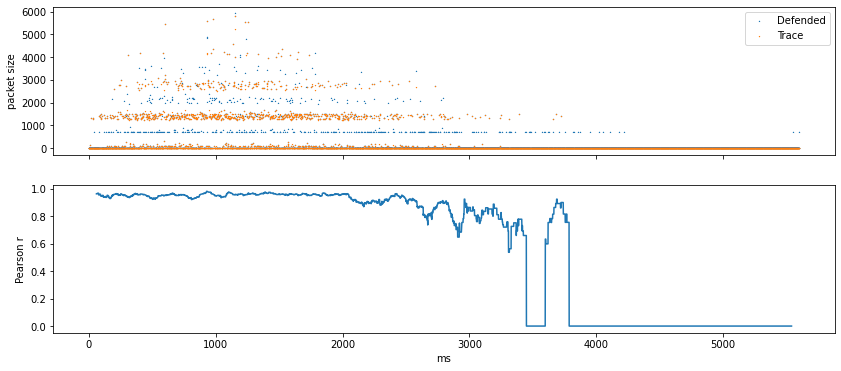

In [65]:
import pandas as pd
r_window_size = 120

df = pd.DataFrame(list(zip(binned_df, binned_tr)), index=bins, columns=["Defended", "Trace"])
print(df)

rolling_r = df['Defended'].rolling(window=r_window_size, center=True).corr(df['Trace'])

f,ax=plt.subplots(2,1,sharex=True, figsize=(14,6))
ax[0].scatter(bins, binned_df, label="Defended", s=0.5, marker='1')
ax[0].scatter(bins, binned_tr, label="Trace", s=0.5, marker='2')
ax[0].set(xlabel='ms',ylabel='packet size')
ax[0].legend()
rolling_r.plot(ax=ax[1])
ax[1].set(xlabel='ms',ylabel='Pearson r')
f.show()